***# TALLER 1 METODOS COMPUTACIONALES 2***

***# PUNTO 1)***

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


#datos de pureba

ts = np.linspace(0,20,200)
ys = np.sin(ts)



#punto 1
def NUDFT(t_s,y_s,f):
  j = 1j
  return (y_s*np.exp(-(np.pi*2)*(j)*(t_s)*f)).sum()



print("Datos de prueba:"+ str(NUDFT(ts,ys,0.1)))
print("Datos de prueba Norma:" + str(np.abs(NUDFT(ts,ys,0.1))))

Datos de prueba:(10.182890588732711-9.435365325708712j)
Datos de prueba Norma:13.88226853117629


h

### ***PUNTO 2)***

9.98


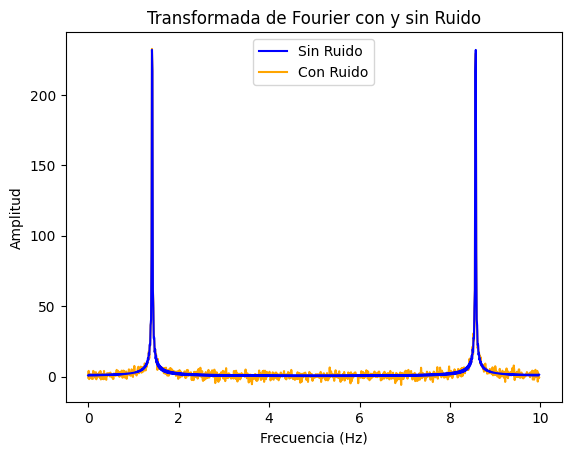

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

t = np.linspace(0,50,500)
y = np.sin((np.pi*2)*((2)**(1/2))*t)

fs = 1/((t[1]-t[0]))
transformada = NUDFT(t,y,fs)
print(fs)

f = np.arange(0,fs,0.01)

lista = []

for a in f:
  fourier = NUDFT(t,y,a)
  norma = np.abs(fourier)
  lista.append(norma)

lista_2 = lista.copy()

lista_2 += np.random.normal(0.0,2,len(lista_2))

plt.plot(f, lista, label="Sin Ruido", color='blue')
plt.plot(f, lista_2, label="Con Ruido", color='orange',zorder=-2)
plt.legend()  # Mostrar la leyenda
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Transformada de Fourier con y sin Ruido')
plt.show()

**Al agregar ruido a la señal en y podemos ver como esta tiende a tener mas picos  **

## ***PUNTO 3***

[  1   3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33  35
  37  39  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69  71
  73  75  77  79  81  83  85  87  89  91 100 102 104 106 108 110 112 114
 116 118 120 122 124 126 128 130 132 134 136 141 146 148 150 152 154 156
 158 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192
 194 196 198 200 202 204 206 208 210 212 214 216 218 220 222 224 226 228
 230 232 234 236 238 240 242 244 246 248 250 252 254 256 258 260 262 264
 266 268 270 272 274 276 278 280 282 284 286 288 290 292 294 296 298 300
 302 304 306 308 310 312 314 316 318 320 322 324 326 328 330 332 334 336
 338 340 342 344 346 348 350 352 354 356 358 360 362 364 366 368 370 372
 374 376 378 380 382 384 386 388 390 392 394 396 398 400 402 404 406 408
 410 412 414 416 418 420 422 424 426 428 430 432 434 436 438 440 442 444
 446 448 450 452 454 456 458 460 462 464 466 468 470 472 474 476 478 480
 482 484 486 488 490 492 494 496 498 500 502 504 50

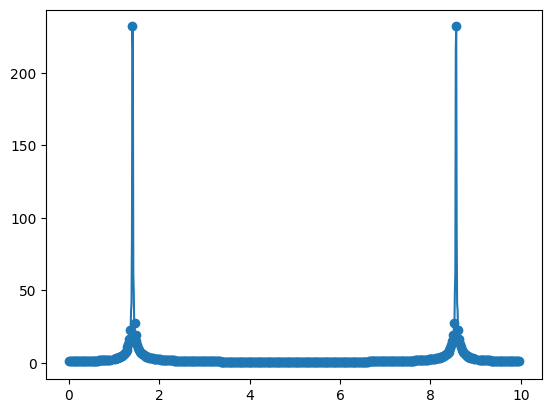

In [16]:
peaks, _= find_peaks(lista)
print(peaks)

lista_3 = np.array(lista.copy())

plt.scatter(f[peaks],lista_3[peaks])

plt.plot(f,lista)

peak_index = peaks[0]
peak_height = lista[peak_index]

half_height = peak_height / 2

# Encontrar los puntos donde la señal cruza la media altura a izquierda y derecha del pico
left_idx = np.where(y[:peak_index] <= half_height)[0][-1]
right_idx = np.where(y[peak_index:] <= half_height)[0][0] + peak_index

# Interpolar para encontrar las posiciones exactas del cruce
f_left = f[left_idx] + (half_height - lista[left_idx]) / (lista[left_idx+1] - lista[left_idx]) * (f[left_idx+1] - f[left_idx])
f_right = f[right_idx] + (half_height - lista[right_idx-1]) / (lista[right_idx] - lista[right_idx-1]) * (f[right_idx] - f[right_idx-1])


fwhm = f_right - f_left

print(f"El ancho a media altura del pico es: {fwhm}")

-El ancho a media altura del pico es: (0.03587487192106198) cuando tenemos un tMAX = 50 Y UN N = 500


-El ancho a media altura del pico es: (0.009999999999999787) cuando tenemos un N = 500 Y UN TMAX =100. No cambia la posicion, pero en cambio disminuye aumento el ancho de banda de los picos en comparacion de  Tmax = 50 N = 500


-El ancho a media altura del pico es: ( 0.03000000000000009) cuando tenemos un N = 1000 Y UN T MAx = 50. La posicion y el ancho no  cambian significativamenter en comparacion al caso base de tmax = 50 y N = 500

**# PUNTO 4)**

0.66


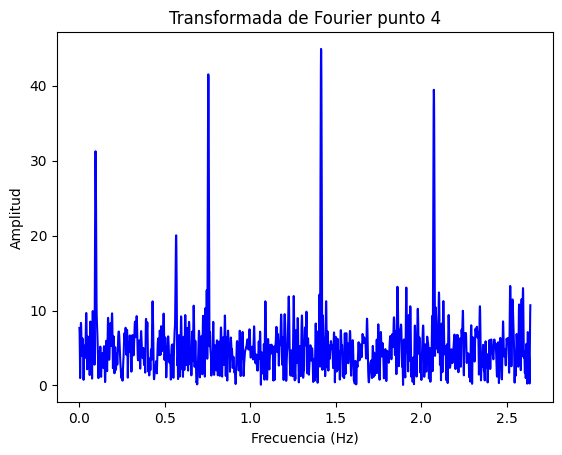

In [13]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

t = np.linspace(0,150,100)
t_ruido = t+np.random.normal(0.0,0.1,len(t))
y = np.sin((np.pi*2)*((2)**(1/2))*t_ruido)

fs = 1/((t[1]-t[0]))
print(fs)
lf = 4*fs

f =  np.arange(0,lf,0.001)

lista = []

for a in f:
  fourier = NUDFT(t_ruido,y,a)
  norma = np.abs(fourier)
  lista.append(norma)


plt.plot(f, lista, label="Sin Ruido", color='blue')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Transformada de Fourier punto 4')
plt.show()




A pesar de que la perturbación en t hace que las muestras se distribuyan en diferentes puntos, esto  es suficiente para superar el límite de Nyquist y recuperar la frecuencia original de la señal